In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adolescent_fertility = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/adolescentFertility.csv")
birth = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/birth.csv")
continents = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/Continents.csv")
death = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/death.csv")
fertility = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/fertility.csv")
gdp = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/GDP.csv")
mortality = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/mortality.csv")
unemployment = pd.read_csv("C:/Users/Daniel/Desktop/Curso data science TEC_Monterrey/Notebooks/practicas/data/Unemployment.csv")

In [3]:
adolescent_fertility.columns = [i.lower().replace(" ","_") for i in adolescent_fertility.columns]
birth.columns = [i.lower().replace(" ","_") for i in birth.columns]
continents.columns = [i.lower().replace(" ","_") for i in continents.columns]
death.columns = [i.lower().replace(" ","_") for i in death.columns]
fertility.columns = [i.lower().replace(" ","_") for i in fertility.columns]
gdp.columns = [i.lower().replace(" ","_") for i in gdp.columns]
mortality.columns = [i.lower().replace(" ","_") for i in mortality.columns]
unemployment.columns = [i.lower().replace(" ","_") for i in unemployment.columns]

In [4]:
mexico = fertility.loc[fertility["country_name"]=="Mexico","1960":].T

In [5]:
mexico.index.name = "years"
mexico = mexico.set_axis(["mexico"], axis=1)
mexico.head(4)

,mexico
years,
1960,6.769
1961,6.768
1962,6.770
1963,6.775


In [6]:
mexico.shape

(59, 1)

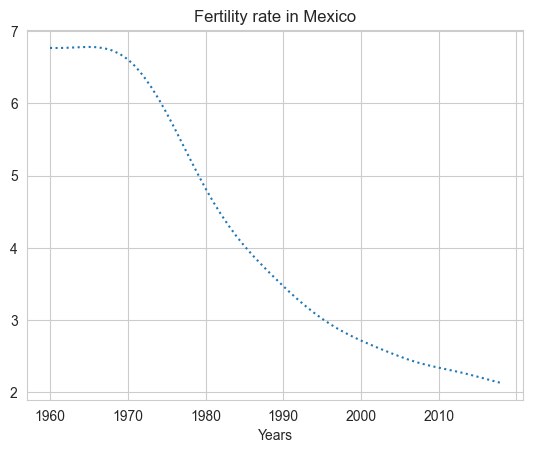

In [7]:
sns.set_style("whitegrid")
mexico.plot(title= "Fertility rate in Mexico", linestyle = ":", legend = "", xlabel="Years")
plt.show()

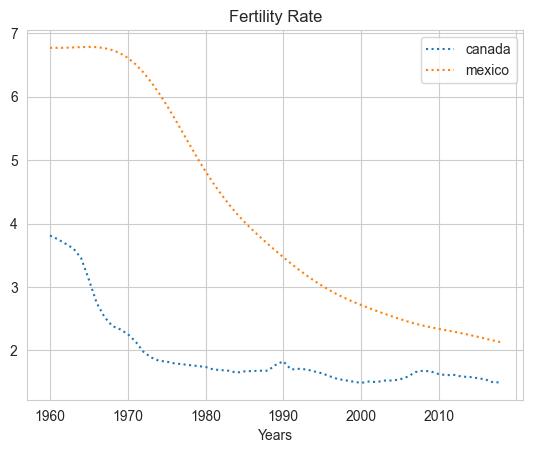

In [8]:
# ahora con mexico y canada

mex_can = fertility.loc[(fertility["country_name"]== "Mexico") | (fertility["country_name"]== "Canada"), "1960":]
mex_can = mex_can.T
mex_can
mex_can.index.name = "years"
mex_can = mex_can.set_axis(["canada","mexico"], axis = 1)
sns.set_style("whitegrid")
mex_can.plot(linestyle = ":",xlabel = "Years", title = "Fertility Rate")
plt.show()

Grafica la información de 5 países (México, Estados Unidos, Somalia y dos más de tu preferencia)
únicamente del último año reportado. En el eje x deben mostrarse los nombres de los países con
alineación vertical.

In [9]:
countries  = fertility.loc[fertility["country_name"].isin(["Mexico","United States","Somalia"])]
dos_paises = fertility.sample(2, random_state= 2, axis=0)

In [10]:
countries

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
152,Mexico,MEX,6.769,6.768,6.770,6.775,6.780,6.783,6.779,6.764,...,2.364,2.340,2.3170,2.2940,2.2700,2.2430,2.2150,2.1860,2.1570,2.1290
211,Somalia,SOM,7.250,7.252,7.255,7.258,7.261,7.261,7.257,7.248,...,6.961,6.865,6.7650,6.6640,6.5630,6.4620,6.3630,6.2650,6.1680,6.0720
249,United States,USA,3.654,3.620,3.461,3.319,3.190,2.913,2.721,2.558,...,2.002,1.931,1.8945,1.8805,1.8575,1.8625,1.8435,1.8205,1.7655,1.7295


In [11]:
paises_random = pd.concat([countries,dos_paises], axis = 0)
paises_random = paises_random.loc[:,"1960":].T
paises_random.index.name = "years"
paises_random = paises_random.set_axis(["Mexico","Somalia","United States","Lithuania","Guinea-Bissau"], axis=1)
paises_random.head(3)

,Mexico,Somalia,United States,Lithuania,Guinea-Bissau
years,,,,,
1960,6.769,7.250,3.654,2.56,5.921
1961,6.768,7.252,3.620,2.53,5.931
1962,6.770,7.255,3.461,2.45,5.941


<Axes: title={'center': 'Fertility Rate 1960'}>

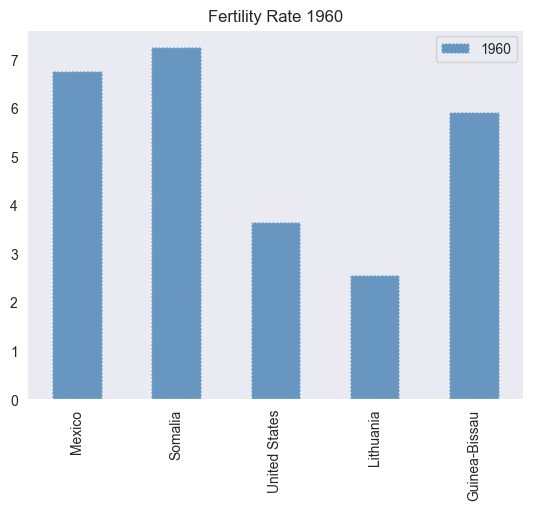

In [12]:
sns.set_style("dark")
fertility_1960 = pd.DataFrame(paises_random.iloc[0,:])
fertility_1960.plot.bar(linestyle=":", legend = "Countries", title = "Fertility Rate 1960", color = "steelblue", alpha = 0.8)

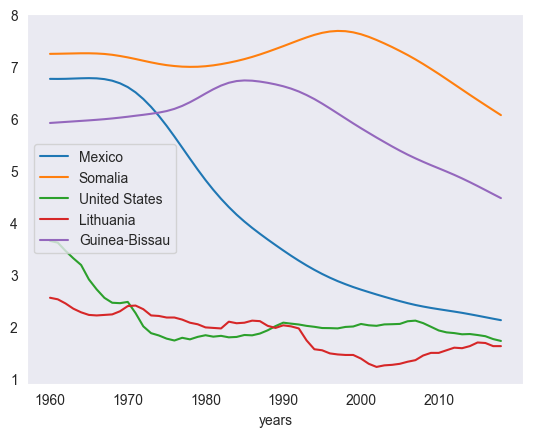

In [13]:
paises_random.plot()
plt.show()

<Axes: >

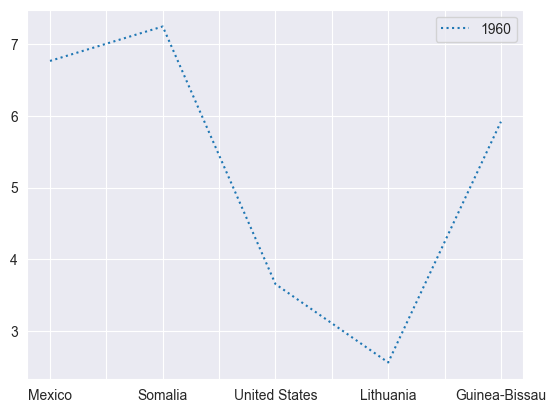

In [14]:
sns.set_style("darkgrid")
pd.DataFrame(paises_random.iloc[0]).plot(style=":")

In [15]:
birth_mexico = birth.loc[birth["country_name"]=="Mexico","1960":]
death_mexico = death.loc[death["country_name"]=="Mexico","1960":]
death_mexico = death_mexico.T
birth_mexico = birth_mexico.T
death_mexico.index.name = "years"
birth_mexico.index.name = "years"
birth_mexico = birth_mexico.set_axis(["birth_mexico"], axis= 1)
death_mexico = death_mexico.set_axis(["death_mexico"], axis= 1) 

In [16]:
birth_mexico.head()

,birth_mexico
years,
1960,45.179
1961,44.919
1962,44.698
1963,44.517
1964,44.366


In [17]:
death_mexico.head()

,death_mexico
years,
1960,12.270
1961,11.915
1962,11.610
1963,11.346
1964,11.114


In [18]:
mexico = birth_mexico.merge(death_mexico, right_index=True, left_index=True, how="outer")
mexico.head(4)

,birth_mexico,death_mexico
years,,
1960,45.179,12.270
1961,44.919,11.915
1962,44.698,11.610
1963,44.517,11.346


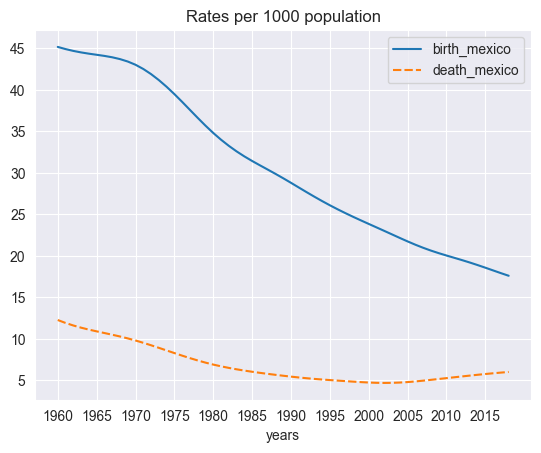

In [19]:
sns.lineplot(mexico)
plt.title("Rates per 1000 population")
plt.xticks(np.arange(0,len(mexico)+1,5))
plt.show()


In [20]:
death_paises = death.loc[:,["country_name","2018"]]
mexico_d = death.loc[death["country_name"] == "Mexico",["country_name","2018"]]
death_paises = death_paises.sort_values(by=["2018"], ascending=False)
death_paises = death_paises.iloc[0:3,:]
death_other = death.sample(1)[["country_name","2018"]]
df_death = pd.concat([mexico_d,death_paises,death_other], axis = 0)
df_death

,country_name,2018
152,Mexico,6.010000
19,Bulgaria,15.400000
143,Latvia,15.000000
246,Ukraine,14.800000
228,East Asia & Pacific (IDA & IBRD countries),6.921837


In [21]:
df_death = df_death.set_index(["country_name"])
df_death

,2018
country_name,
Mexico,6.010000
Bulgaria,15.400000
Latvia,15.000000
Ukraine,14.800000
East Asia & Pacific (IDA & IBRD countries),6.921837


<Axes: title={'center': 'Death Rate'}, ylabel='country_name'>

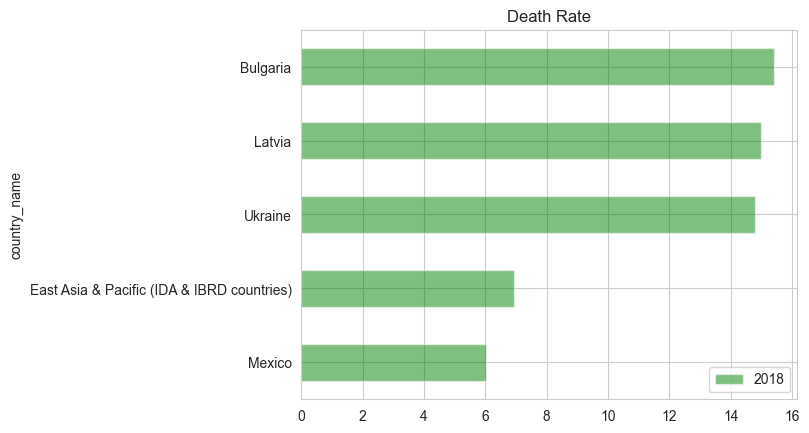

In [22]:
sns.set_style("whitegrid")
df_death.sort_values(by=["2018"]).plot(kind = "barh", color = "green", alpha = 0.5, title= "Death Rate" )

In [23]:
natalidad = birth.loc[:,["country_name","2018"]]
natalidad = natalidad.dropna()

In [24]:
mean_n = natalidad["2018"].mean()

In [25]:
natalidad

,country_name,2018
0,Aruba,11.652
1,Afghanistan,32.487
2,Angola,40.729
3,Albania,11.780
4,Andorra,7.200
...,...,...
259,Kosovo,16.000
260,"Yemen, Rep.",30.453
261,South Africa,20.510
262,Zambia,36.192


In [26]:
natalidad["natalidad"] = ""

In [27]:
natalidad.loc[natalidad["2018"] <= mean_n, "natalidad"] = "no"
natalidad.loc[natalidad["2018"] > mean_n, "natalidad"] = "si"

In [28]:
natalidad

,country_name,2018,natalidad
0,Aruba,11.652,no
1,Afghanistan,32.487,si
2,Angola,40.729,si
3,Albania,11.780,no
4,Andorra,7.200,no
...,...,...,...
259,Kosovo,16.000,no
260,"Yemen, Rep.",30.453,si
261,South Africa,20.510,si
262,Zambia,36.192,si


In [29]:
natalidad.dropna(subset=["2018"], inplace= True, axis=0)
natalidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 263
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  251 non-null    object 
 1   2018          251 non-null    float64
 2   natalidad     251 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.8+ KB


In [30]:
lista_con = len(natalidad[natalidad["2018"]< mean_n])
listas = [lista_con, len(natalidad) - lista_con]
listas

[148, 103]

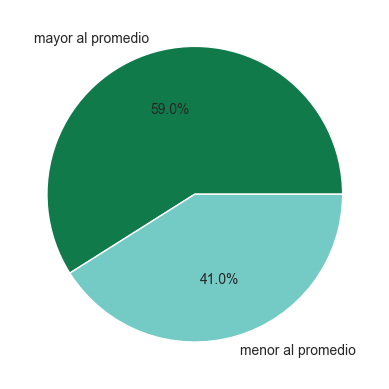

In [31]:
sns.set_style("white")
plt.pie(listas, labels=["mayor al promedio","menor al promedio"], colors=["#107A4A","#74CBC5"], autopct="%1.1f%%")
plt.show()

In [32]:
mexico_f = adolescent_fertility.loc[adolescent_fertility["country_name"]=="Mexico","1960":]
mexico_m = mortality.loc[mortality["country_name"]=="Mexico","1960":]

In [33]:
mexico_m = mexico_m.T
mexico_f = mexico_f.T
mexico_f.index.name = "years"
mexico_m.index.name = "years"
mexico_f = mexico_f.set_axis(["fertility"], axis = 1)
mexico_m = mexico_m.set_axis(["mortality"], axis = 1)


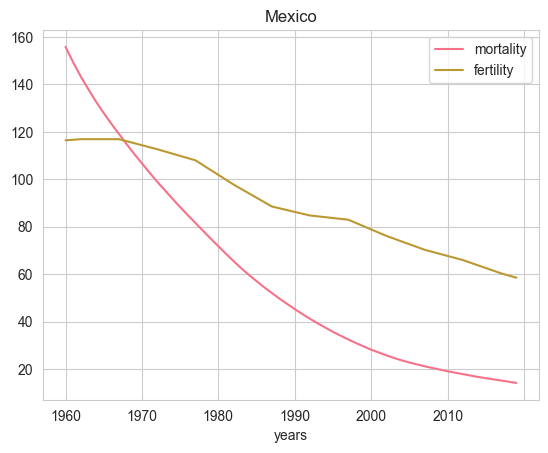

In [34]:
sns.set_palette("husl")
sns.set_style("whitegrid")
mexico_fd = mexico_m.merge(mexico_f, right_index=True, left_index=True, how = "outer")
mexico_fd.plot(style="-", title="Mexico")
plt.show()


In [35]:
norteamerica_a = adolescent_fertility.loc[(adolescent_fertility["country_code"]=="CAN")|(adolescent_fertility["country_code"]=="MEX")|(adolescent_fertility["country_code"]=="USA"),["country_code","2019"]]
nort_a = mortality.loc[(mortality["country_code"]=="CAN")|(adolescent_fertility["country_code"]=="MEX")|(adolescent_fertility["country_code"]=="USA"),["country_code","2019"]]
norteamerica_a

,country_code,2019
33,CAN,7.6822
152,MEX,58.5434
249,USA,17.2524


In [36]:
nort_a.set_index(["country_code"],inplace=True)
norteamerica_a.set_index(["country_code"],inplace=True)

In [37]:
p_norteamerica = norteamerica_a.merge(nort_a, right_index=True, left_index=True, how = "outer", suffixes=["_mortality","_fertility"])
p_norteamerica

,2019_mortality,2019_fertility
country_code,,
CAN,7.6822,4.9
MEX,58.5434,14.2
USA,17.2524,6.5


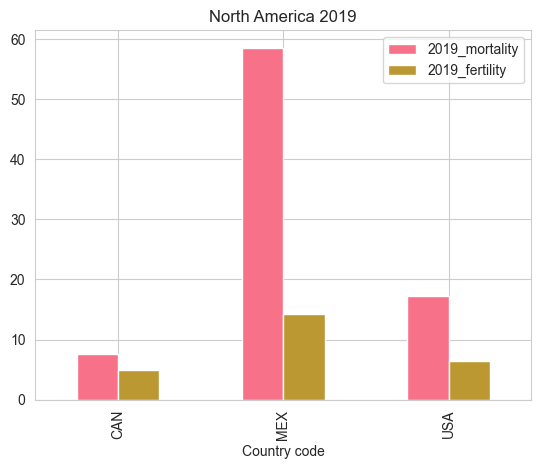

In [38]:
p_norteamerica.plot.bar(title = "North America 2019", xlabel = "Country code")
plt.show()

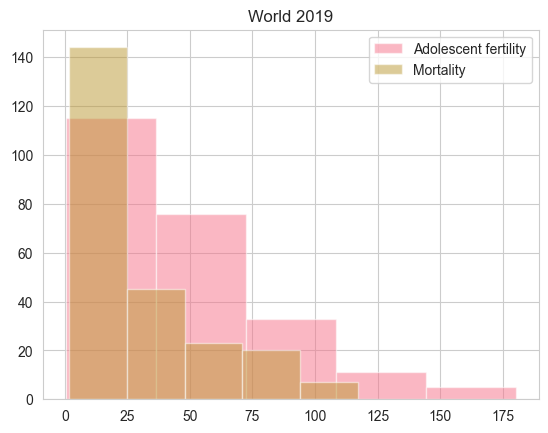

In [39]:
plt.hist("2019",data=adolescent_fertility,label = "Adolescent fertility",bins=5, alpha = 0.5)
plt.hist("2019",data=mortality,bins=5,label = "Mortality" ,alpha = 0.5)
plt.title("World 2019")
plt.legend()
plt.show()

In [40]:
mortality[["country_name","2019"]]

,country_name,2019
0,Aruba,NaN
1,Afghanistan,60.3
2,Angola,74.7
3,Albania,9.7
4,Andorra,3.0
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",58.4
261,South Africa,34.5
262,Zambia,61.7


<Axes: >

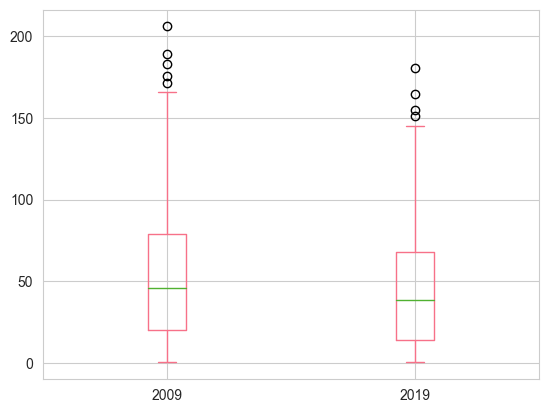

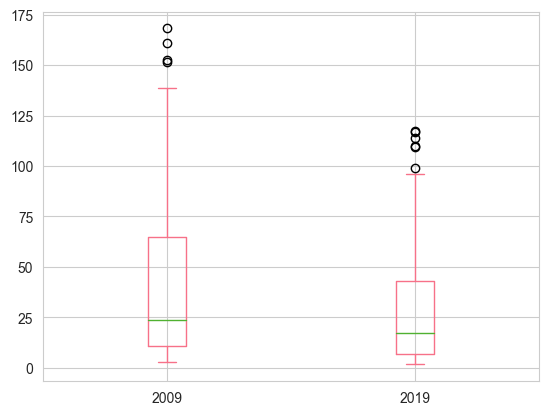

In [41]:
adolescent_fertility[["2009","2019"]].plot.box()
mortality[["2009","2019"]].plot.box()

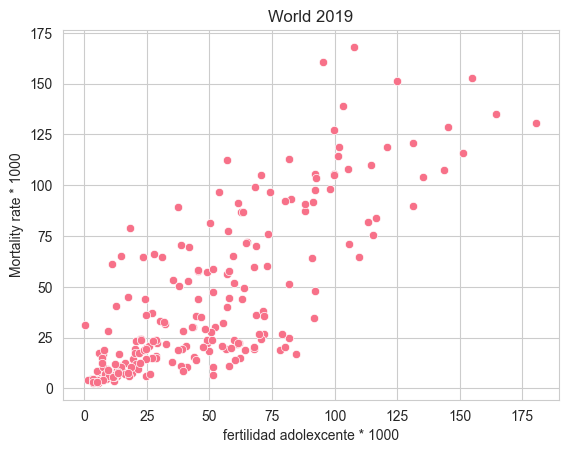

In [42]:
sns.scatterplot(x=adolescent_fertility["2019"], y=mortality["2009"])
plt.xlabel("fertilidad adolexcente * 1000")
plt.ylabel("Mortality rate * 1000")
plt.title("World 2019")
plt.show()

In [43]:
# coeficiente de correlacion
corr  = adolescent_fertility["2019"].corr(mortality["2019"])
print(f"El coeficiente de coorelacion es de:\n{corr:.2f}")

El coeficiente de coorelacion es de:
0.79


Trabajando con: gdp y unemployment, el contenido de los archivos GDP.csv y Unemployment.csv

-El PIB por persona empleada es el producto interno bruto (PIB) dividido por el total de personas
empleadas en la economía.

-El desempleo se refiere a la proporción de la fuerza laboral que no tiene trabajo, pero que
está disponible y en busca de empleo.

In [44]:
g = gdp[["country_name","2019"]]
h = unemployment[["country_name","2019"]]
# g.set_index(["country_name"], inplace = True)
# h.set_index(["country_name"], inplace = True)
info_2019 = g.merge(h, on="country_name", how = "outer",suffixes=(["_gdp","_unemployment"]))
info_2019

,country_name,2019_gdp,2019_unemployment
0,Aruba,NaN,NaN
1,Afghanistan,8246.351581,10.980000
2,Angola,17339.271710,6.930000
3,Albania,31009.390130,11.470000
4,Andorra,NaN,NaN
...,...,...,...
259,Kosovo,NaN,NaN
260,"Yemen, Rep.",NaN,12.900000
261,South Africa,43799.052020,28.469999
262,Zambia,9522.766264,11.910000


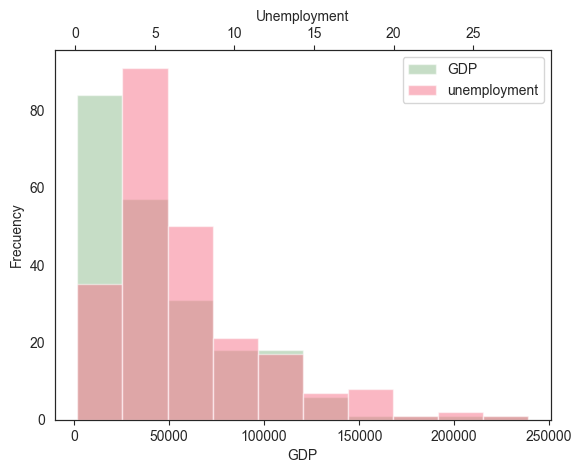

In [45]:
sns.set_style("white")
fig, ax = plt.subplots()

ax.hist(x = "2019_gdp",data = info_2019, color="darkseagreen", alpha = 0.5, label = "GDP")
ax.set_xlabel("GDP")
ax.set_ylabel("Frecuency")

ax1 = ax.twiny()
ax1.hist(x = "2019_unemployment",data = info_2019, alpha= 0.5, label="unemployment")
ax1.set_xlabel("Unemployment")
ax1.set_ylabel("Frecuency")

fig.legend(bbox_to_anchor = (0.9,0.88))
plt.show()

In [46]:
continents_2019 = continents.merge(info_2019, left_on= "name", right_on="country_name", how= "outer")
continents_2019

,name,country_code,continent,region,country_name,2019_gdp,2019_unemployment
0,Afghanistan,AFG,Asia,Southern Asia,Afghanistan,8246.351581,10.980000
1,Åland Islands,ALA,Europe,Northern Europe,NaN,NaN,NaN
2,Albania,ALB,Europe,Southern Europe,Albania,31009.390130,11.470000
3,Algeria,DZA,Africa,Northern Africa,Algeria,44185.464150,11.810000
4,American Samoa,ASM,Oceania,Polynesia,American Samoa,NaN,NaN
...,...,...,...,...,...,...,...
322,NaN,NaN,NaN,NaN,"Venezuela, RB",NaN,7.160000
323,NaN,NaN,NaN,NaN,British Virgin Islands,NaN,NaN
324,NaN,NaN,NaN,NaN,World,39498.877860,5.372859
325,NaN,NaN,NaN,NaN,Kosovo,NaN,NaN


In [47]:
continents_group = continents_2019.loc[:,["continent","2019_gdp","2019_unemployment"]]
continents_group

,continent,2019_gdp,2019_unemployment
0,Asia,8246.351581,10.980000
1,Europe,NaN,NaN
2,Europe,31009.390130,11.470000
3,Africa,44185.464150,11.810000
4,Oceania,NaN,NaN
...,...,...,...
322,NaN,NaN,7.160000
323,NaN,NaN,NaN
324,NaN,39498.877860,5.372859
325,NaN,NaN,NaN


In [48]:
continents_group = continents_group.groupby("continent").mean()
continents_group

,2019_gdp,2019_unemployment
continent,,
Africa,17198.839709,8.608936
Americas,41690.232360,6.821724
Asia,48313.165592,5.239250
Europe,89718.309890,6.296857
Oceania,36056.567613,5.731818


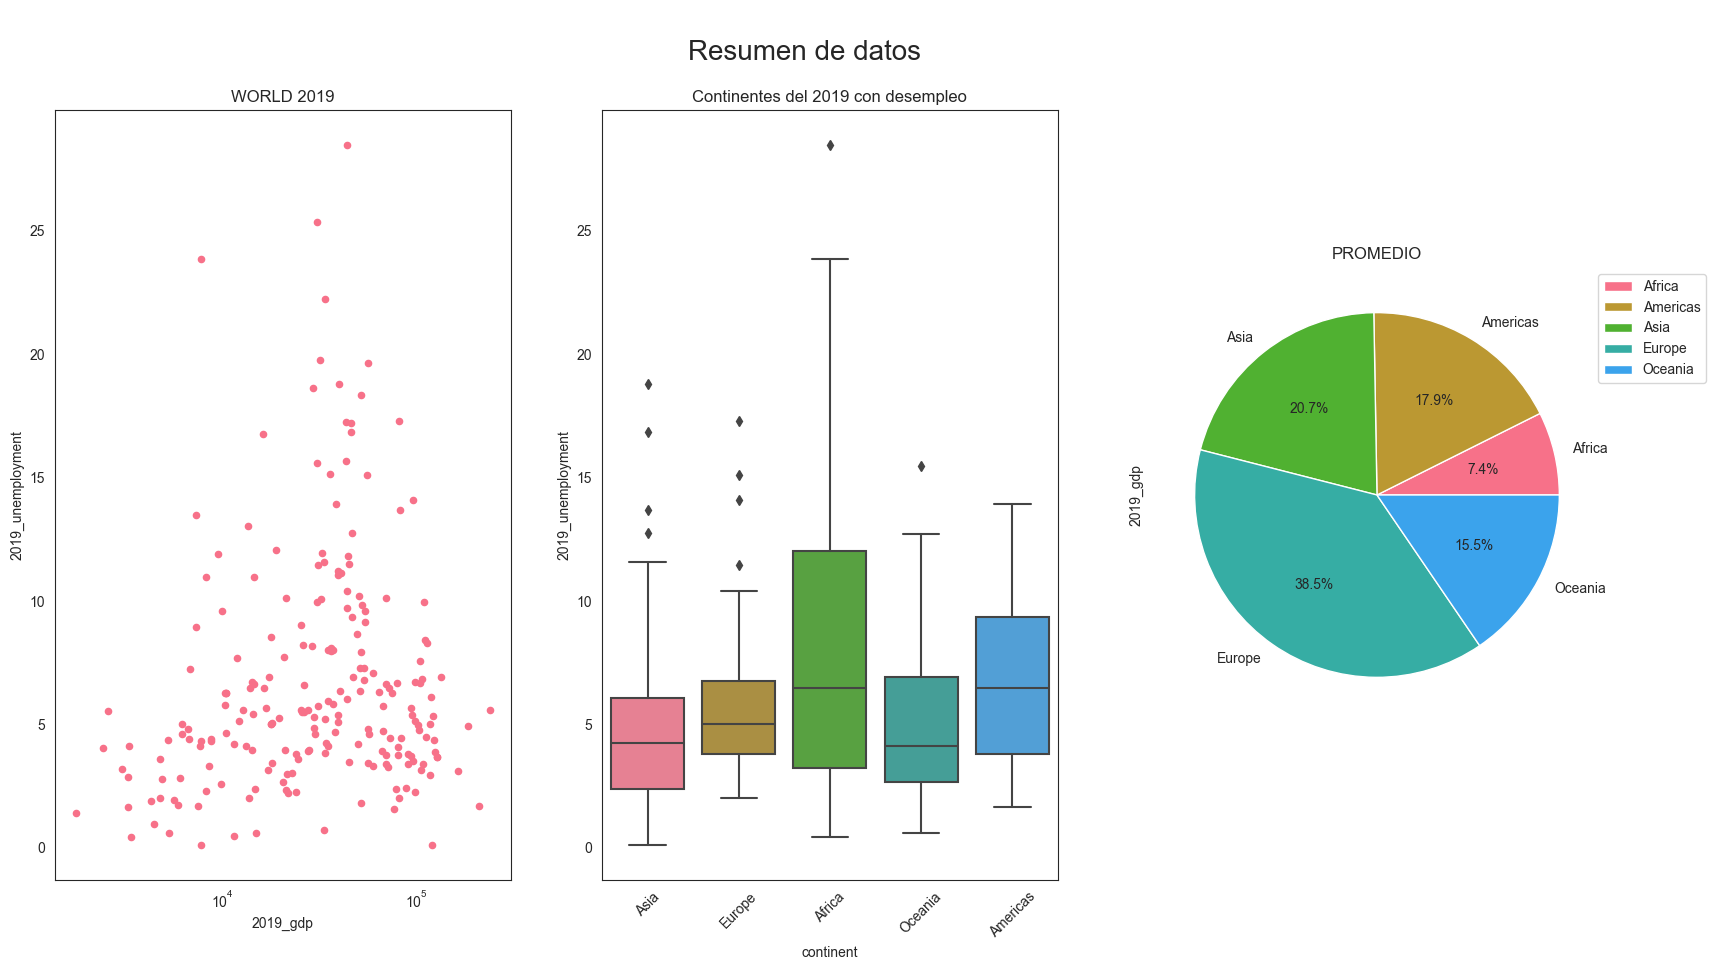

In [49]:
fig,ax = plt.subplots(1,3, figsize = (20,10))

fig.suptitle("\nResumen de datos", size = 20)

ax_1 = ax[0]
ax_2 = ax[1]
ax_3 = ax[2]

continents_2019.plot.scatter(x="2019_gdp" ,y = "2019_unemployment" ,ax = ax_1, logx = True)
ax_1.set_title("WORLD 2019")

sns.boxplot(ax=ax_2, data=continents_2019,x = "continent" , y= "2019_unemployment")
ax_2.tick_params(axis  ="x",rotation = 45)
ax_2.set_title("\nContinentes del 2019 con desempleo")

continents_group.plot.pie(y = "2019_gdp", labels = continents_group.index, autopct = "%1.1f%%", ax = ax_3)
ax_3.set_title("PROMEDIO")
ax_3.legend(bbox_to_anchor = (0.97,1))



plt.show()

In [50]:
gdp_T = gdp.loc[gdp["country_name"] =="Mexico","1991":].T
unemployment_T = unemployment.loc[unemployment["country_name"] =="Mexico","1991"].T
gdp_T.


SyntaxError: invalid syntax (3110351646.py, line 3)

In [ ]:
mexico = pd.concat([gdp[gdp["country_name"]== "Mexico"], unemployment[unemployment["country_name"]=="Mexico"]], axis=0)
mexico.drop(["country_name","country_code"], axis = 1, inplace= True)
mexico =  mexico.T
mexico.index.name = "year"
mexico = mexico.set_axis(["gdp","unemployment"], axis = 1)
mexico.head(5)

,gdp,unemployment
year,,
1991,43868.90541,3.15
1992,43804.94070,3.24
1993,43077.84603,3.37
1994,44715.30806,4.44
1995,42238.58102,7.10


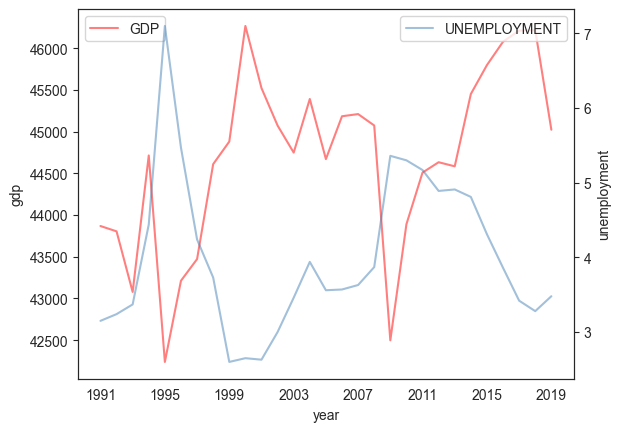

In [ ]:
ax_1 = sns.lineplot(x = mexico.index, y = mexico["gdp"], label = "GDP", color = "red", alpha = 0.5)

ax_2 = ax_1.twinx()

ax_2 = sns.lineplot(x = mexico.index, y = mexico["unemployment"], label = "UNEMPLOYMENT", color= "steelblue", alpha = 0.5)

plt.xticks(np.arange(0,len(mexico)+1,4))
plt.show()